#3.8.3Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order

#import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
import seaborn as sns
import scipy.stats as stats

#Loading data into pandas data frame

In [2]:
df=pd.read_csv("highest number of rapes & Kidnappings.csv")

#Head of data

In [3]:
df.head()

,State_UT,District,Year,Rape,Kidnapping_Abduction
0,MADHYA PRADESH,TOTAL,2012,3425,1127
1,MADHYA PRADESH,TOTAL,2011,3406,1088
2,MADHYA PRADESH,TOTAL,2010,3135,1030
3,MADHYA PRADESH,TOTAL,2007,3010,701
4,MADHYA PRADESH,TOTAL,2009,2998,841


#Lower data of data frame

In [4]:
df.tail()

,State_UT,District,Year,Rape,Kidnapping_Abduction
9012,NAGALAND,MON,2007,0,0
9013,NAGALAND,PEREN,2007,0,0
9014,NAGALAND,PHEK,2007,0,0
9015,NAGALAND,TUENSANG,2007,0,0
9016,NAGALAND,ZUNHEBOTO,2007,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State_UT              9017 non-null   object
 1   District              9017 non-null   object
 2   Year                  9017 non-null   int64 
 3   Rape                  9017 non-null   int64 
 4   Kidnapping_Abduction  9017 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 352.4+ KB


#from info we see the memory used ,number of columns,data type

In [6]:
df.dtypes

State_UT                object
District                object
Year                     int64
Rape                     int64
Kidnapping_Abduction     int64
dtype: object

#here we have two type of data present object type and int64

In [7]:
df.isnull().sum()

State_UT                0
District                0
Year                    0
Rape                    0
Kidnapping_Abduction    0
dtype: int64

#No any column have null values present

In [8]:
df.describe()

,Year,Rape,Kidnapping_Abduction
count,9017.000000,9017.000000,9017.000000
mean,2006.629034,53.041366,58.535433
std,3.463623,190.741450,246.937464
min,2001.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000
50%,2007.000000,20.000000,18.000000
75%,2010.000000,41.000000,42.000000
max,2012.000000,3425.000000,7910.000000


#Descriptive Statistics: It is used to summarize and describe the features of data in a meaningful way to extract insights. It uses two types of statistic to describe or summarize data:

In [9]:
df.shape

(9017, 5)

#shape of the data 9017 rows and 5 column

In [10]:
df.nunique().to_frame("unique values")

,unique values
State_UT,35
District,808
Year,12
Rape,420
Kidnapping_Abduction,460


#There are many unique values present in data frame ,highest unique values present in District and lowest unique values present in Year

In [11]:
df=df.drop_duplicates()
print("Rows and columns after removing duplicates:",df.shape)

Rows and columns after removing duplicates: (9017, 5)


#There are no duplicate value present in our data set

In [12]:
dfcor=df.corr()
dfcor

,Year,Rape,Kidnapping_Abduction
Year,1.000000,0.029702,0.074188
Rape,0.029702,1.000000,0.728700
Kidnapping_Abduction,0.074188,0.728700,1.000000


<Axes: >

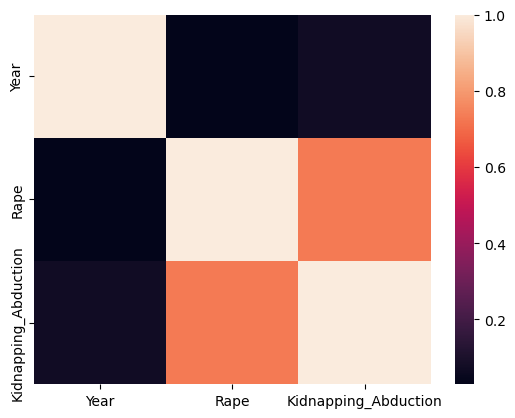

In [13]:
sns.heatmap(dfcor)

#There is corelation between Rape and kidnapping_Abduction

In [14]:
df.skew()

Year                    -0.044446
Rape                     9.654872
Kidnapping_Abduction    14.710715
dtype: float64

#skewness present in year column

<Axes: >

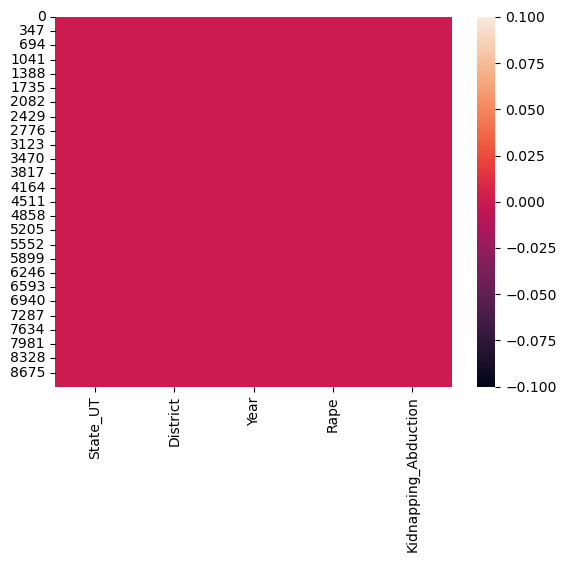

In [15]:
sns.heatmap(df.isnull())

In [16]:
df["Rape"].value_counts()

0      498
1      345
2      270
12     223
3      221
      ... 
608      1
618      1
621      1
623      1
286      1
Name: Rape, Length: 420, dtype: int64

In [17]:
df["State_UT"].value_counts()

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI                183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
GOA                   36
A & N ISLANDS         36
DAMAN & DIU           36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: State_UT, dtype: int64

In [18]:
df["Kidnapping_Abduction"].value_counts()

0       834
1       333
2       264
4       264
5       260
       ... 
783       1
2085      1
1160      1
586       1
198       1
Name: Kidnapping_Abduction, Length: 460, dtype: int64

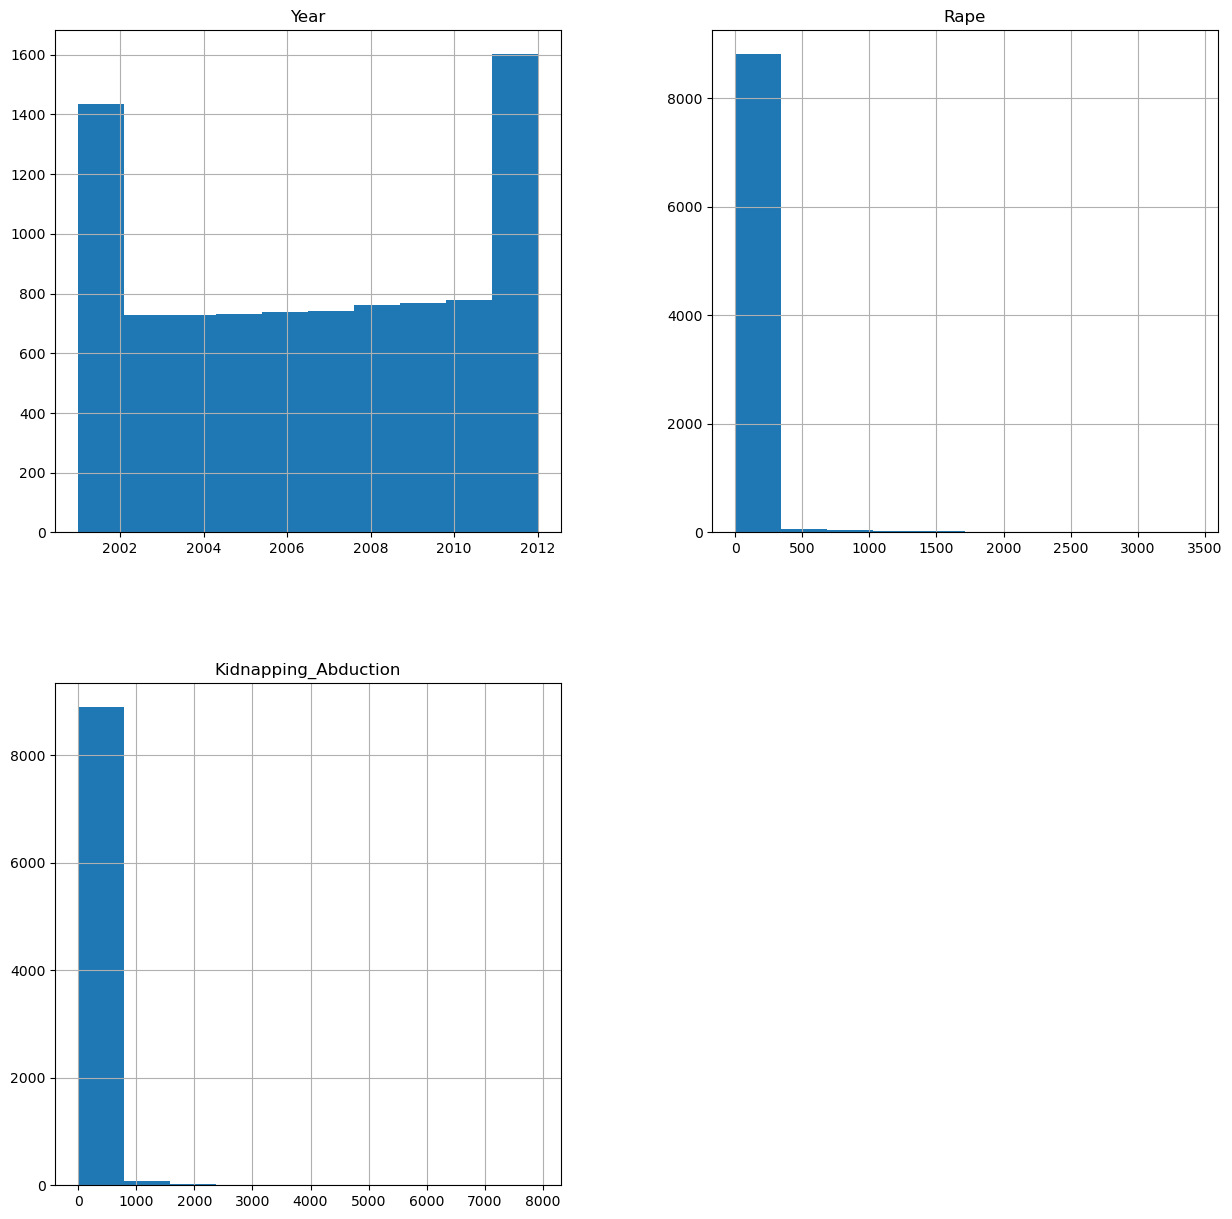

In [19]:
df.hist(figsize=(15,15))
plt.show()

<Axes: >

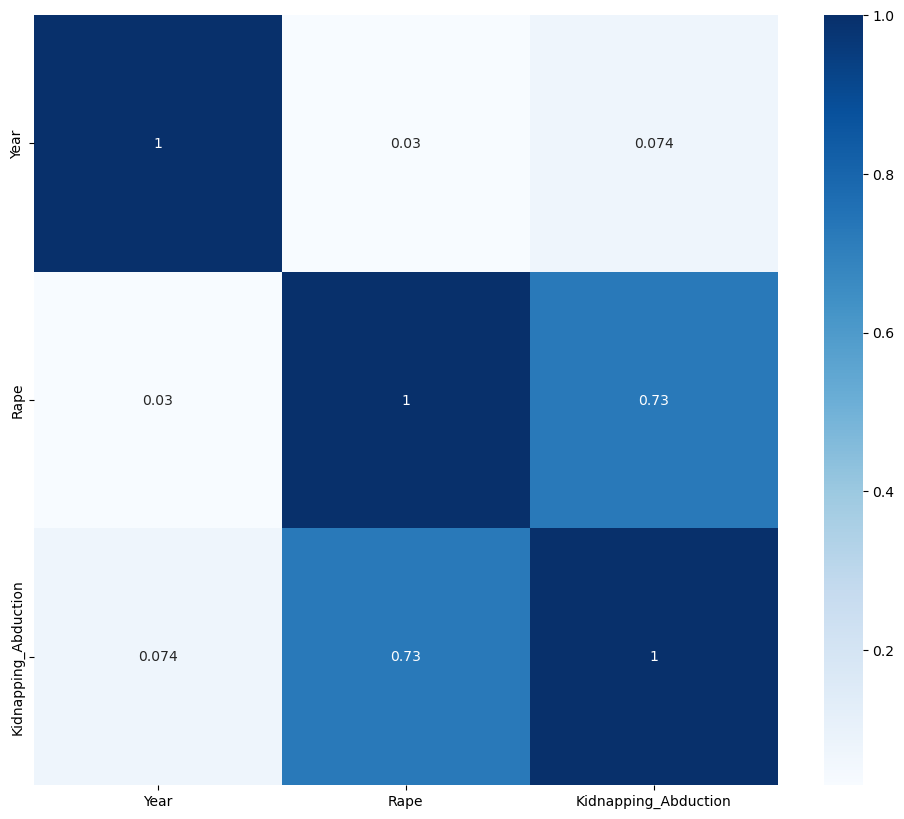

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

Year                       Axes(0.125,0.653529;0.0945122x0.226471)
Rape                    Axes(0.238415,0.653529;0.0945122x0.226471)
Kidnapping_Abduction    Axes(0.351829,0.653529;0.0945122x0.226471)
dtype: object

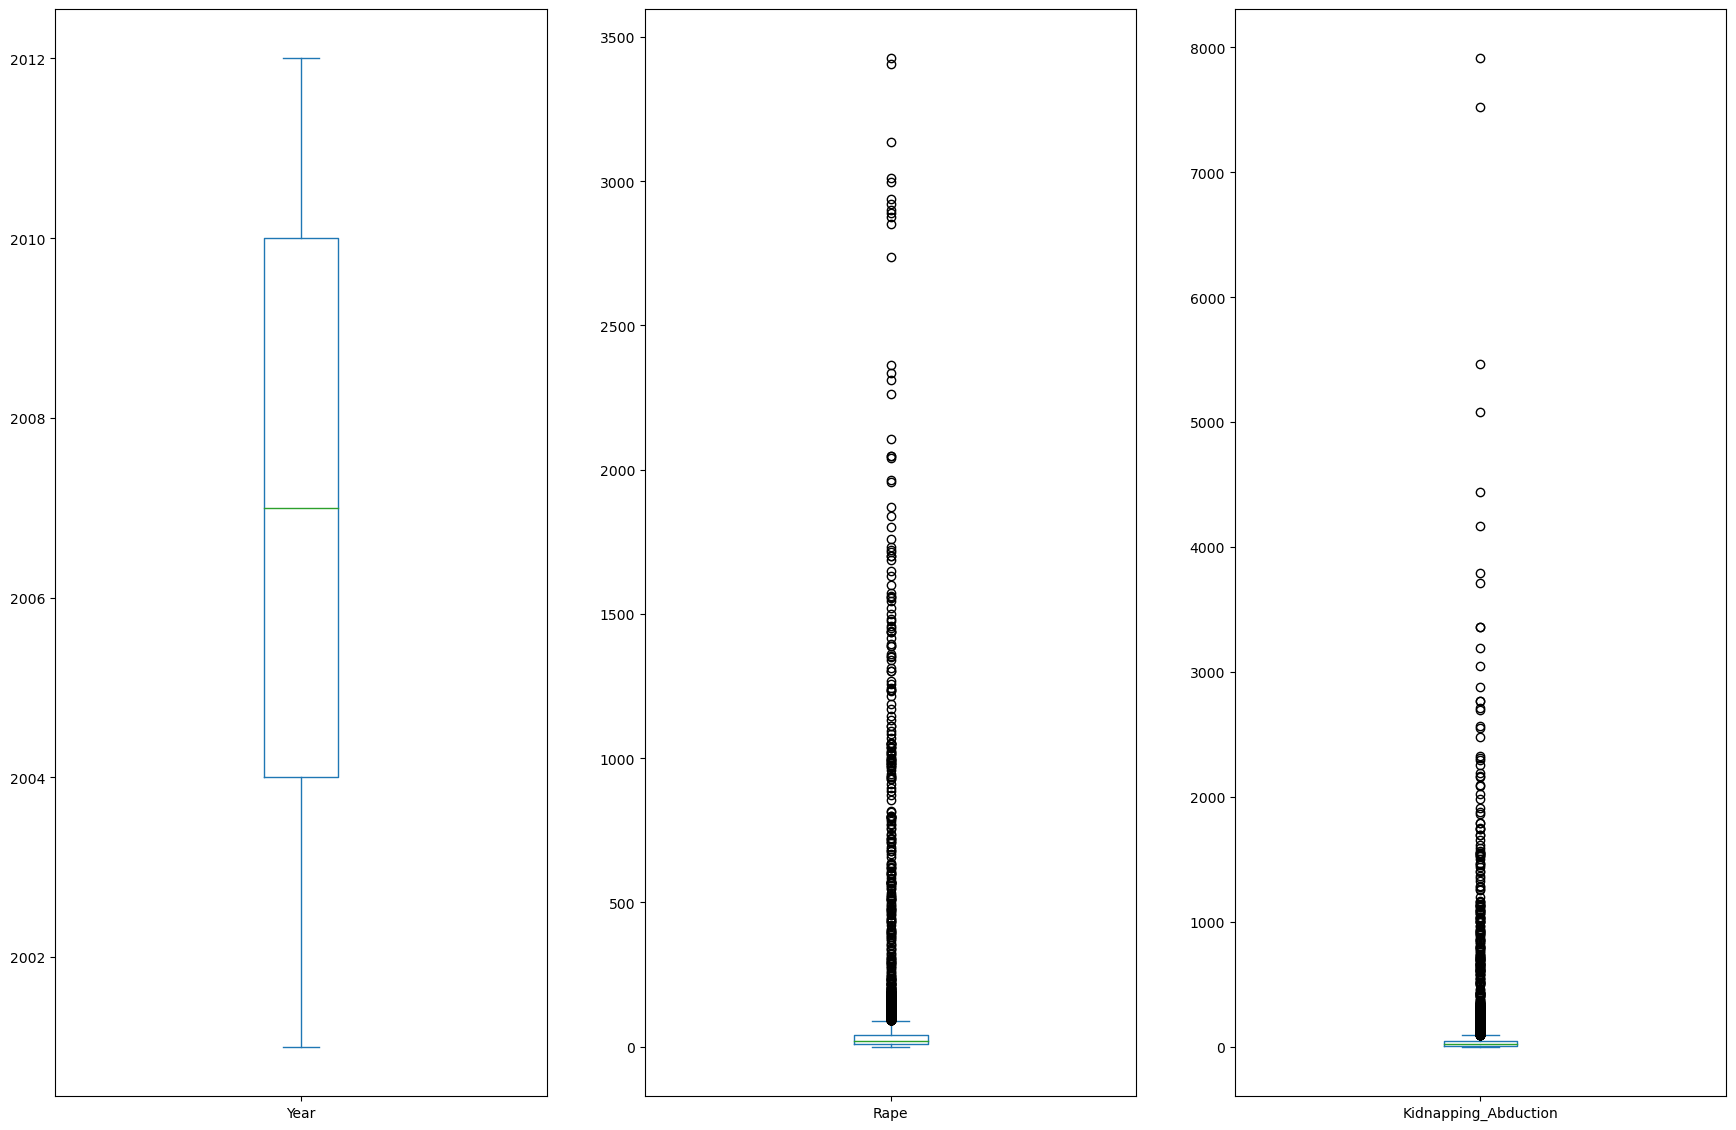

In [21]:
df.plot(kind="box",subplots=True,layout=(3,7),figsize=(52,48))

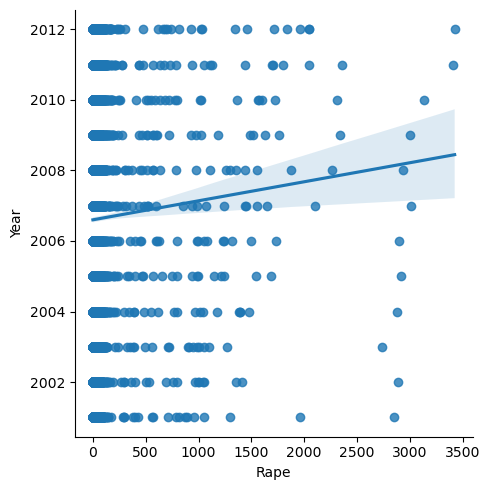

In [22]:
sns.lmplot(x="Rape",y="Year",data=df,palette="colorblind")

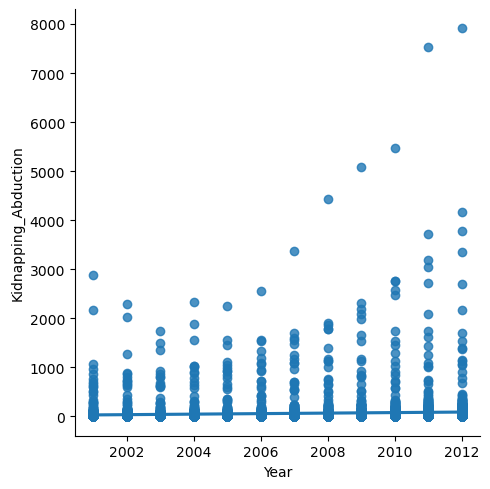

In [23]:
sns.lmplot(x="Year",y="Kidnapping_Abduction",data=df,palette="colorblind")

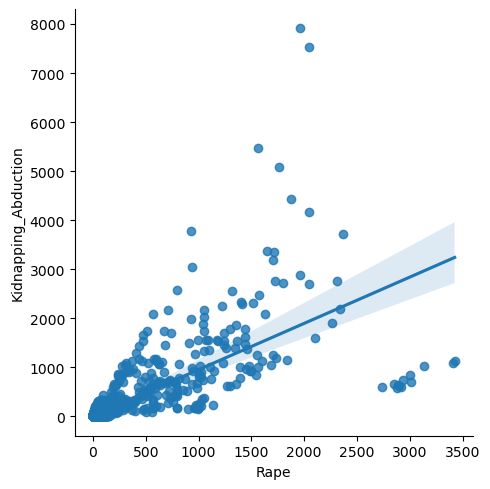

In [24]:
sns.lmplot(x="Rape",y="Kidnapping_Abduction",data=df,palette="colorblind")

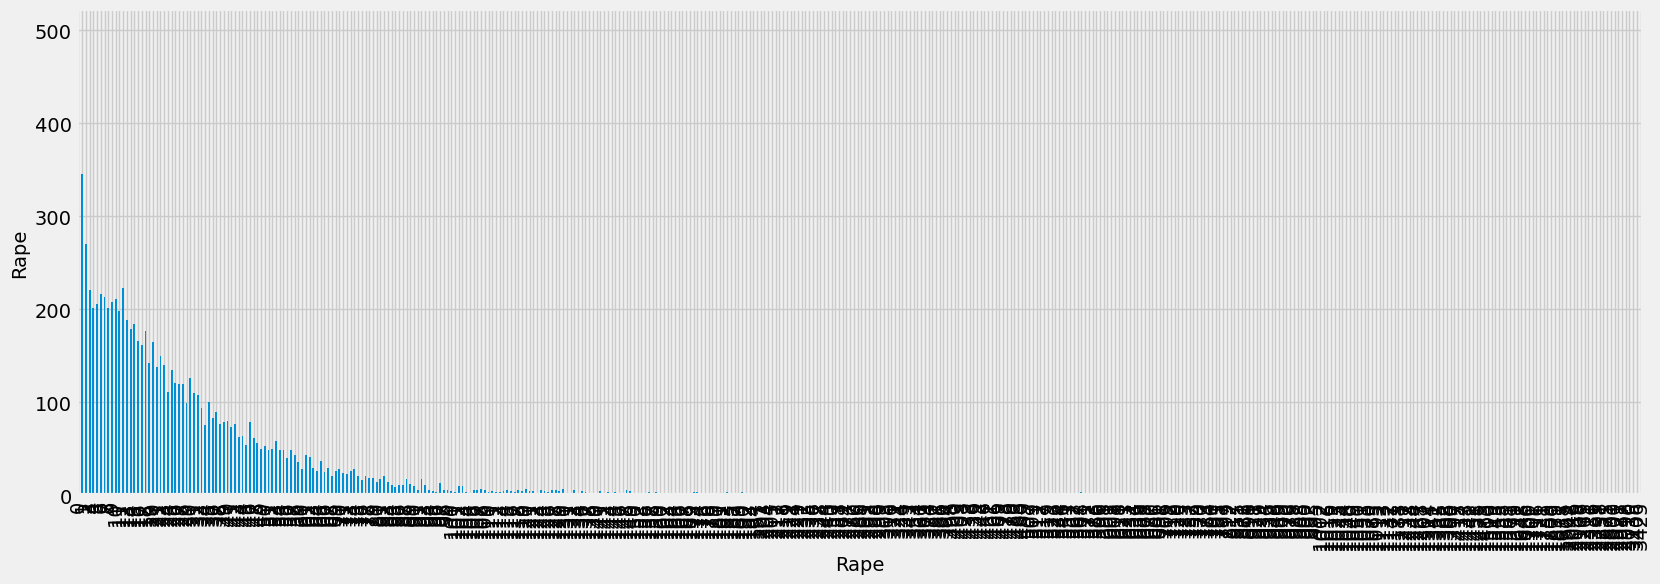

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Rape').Rape.count().plot.bar(ylim=0)
ax.set_ylabel('Rape')
plt.show()

In [26]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)
    

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['State_UT', 'District']

Number Data Types Columns are:
 ['Year', 'Rape', 'Kidnapping_Abduction']


0      498
1      345
2      270
12     223
3      221
      ... 
608      1
618      1
621      1
623      1
286      1
Name: Rape, Length: 420, dtype: int64


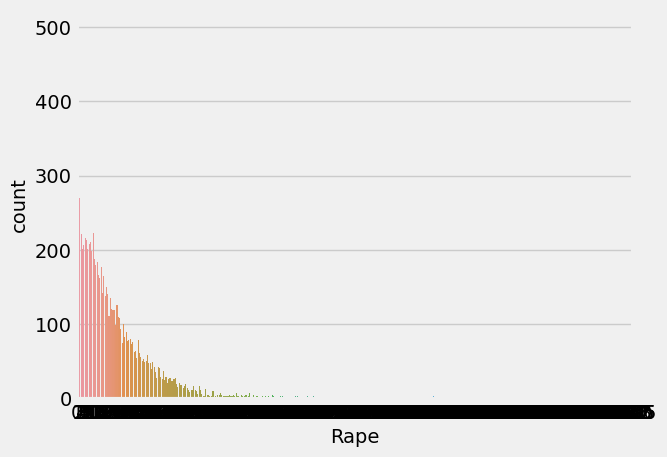

In [27]:
ax=sns.countplot(x="Rape",data=df)
print(df["Rape"].value_counts())

9.654871917981813


<Axes: xlabel='Rape'>

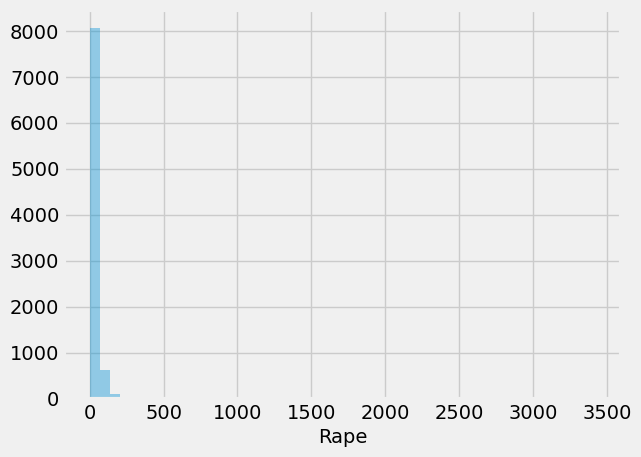

In [28]:
print(df["Rape"].skew())
sns.distplot(df["Rape"],kde=False)

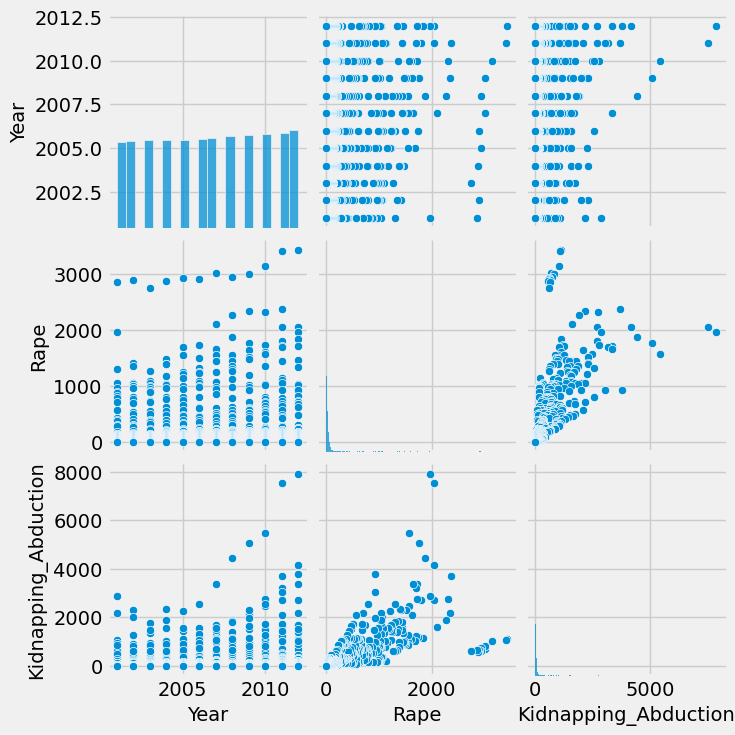

In [29]:
sns.pairplot(df)

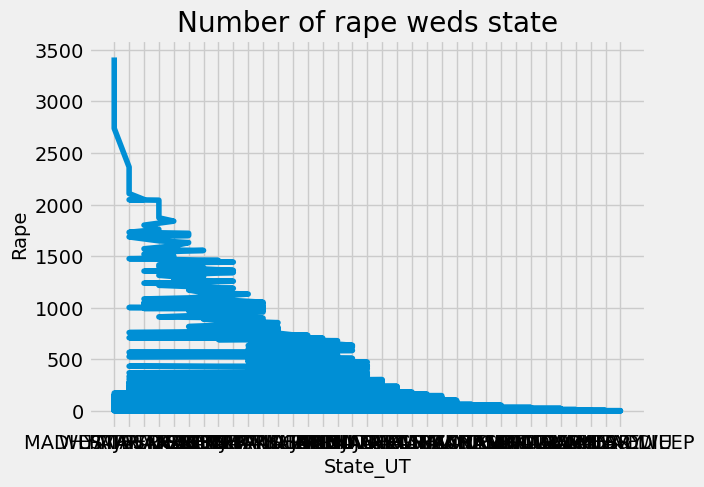

In [30]:
x=df['State_UT']
y=df['Rape']
plt.plot(x,y)
plt.xlabel("State_UT")
plt.ylabel("Rape")
plt.title("Number of rape weds state")
plt.show()

#Madhya Pradesh have highest Rape record available

In [31]:
df.columns

Index(['State_UT', 'District', 'Year', 'Rape', 'Kidnapping_Abduction'], dtype='object')

<Axes: xlabel='Rape', ylabel='State_UT'>

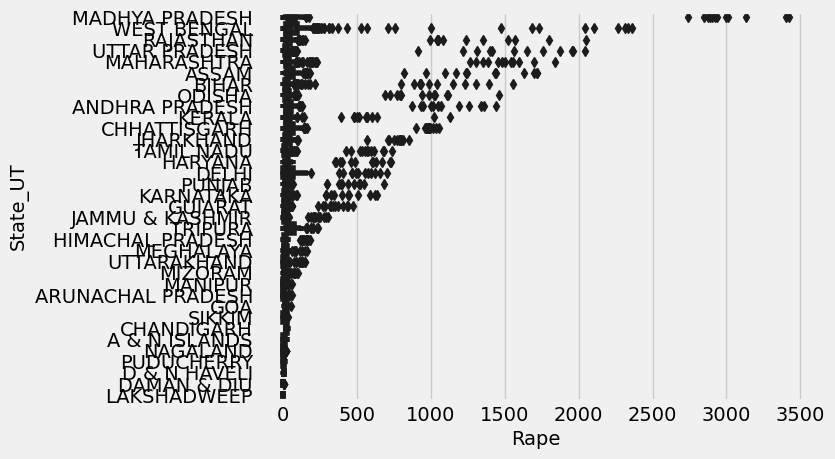

In [32]:
sns.boxplot(y="State_UT", x="Rape", data=df, palette = 'pink')

#from above data we can clearly see that madhya pradesh have highest number of rape case register

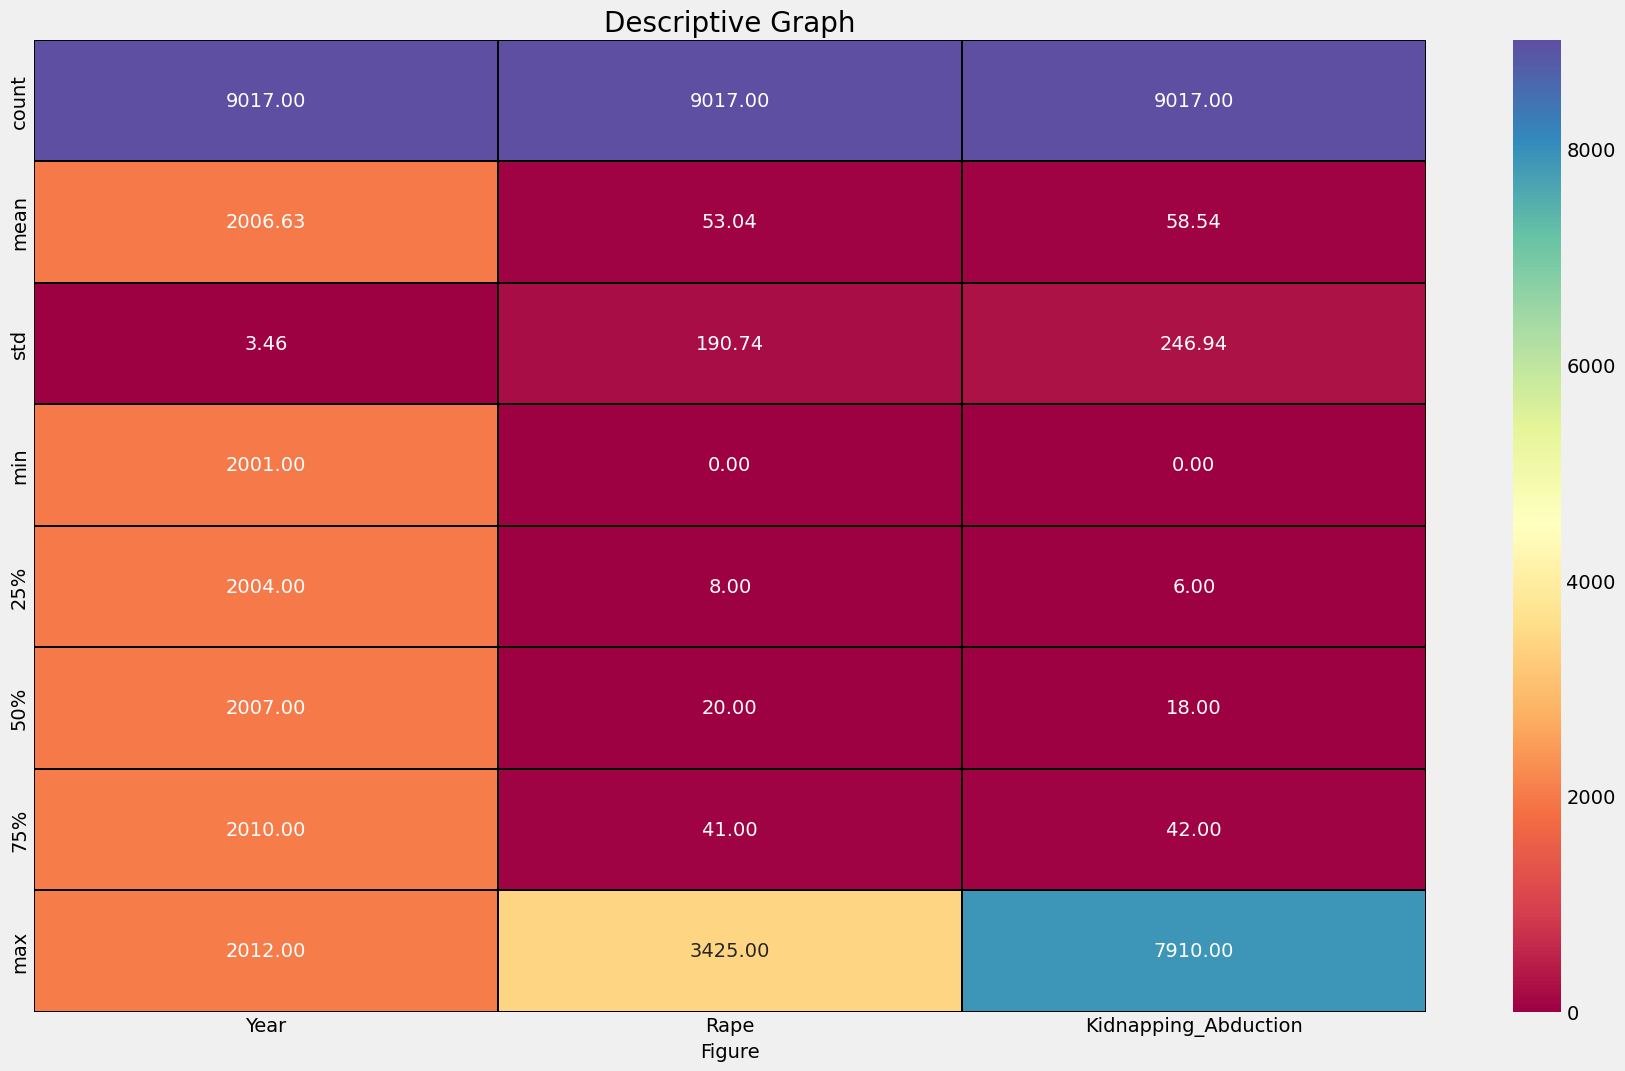

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# 3.8.3Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [34]:
# Rank districts within each state/UT and year by rape
df['Rank'] = df.groupby(['State_UT', 'Year'])['Rape'].rank(method='dense', ascending=False)

# Filter districts with rank 1 (highest number of rape in that state/UT and year)
top_districts = df[df['Rank'] == 1]

# Count the number of years each district appears in the top
district_counts = top_districts.groupby(['State_UT', 'District']).size().reset_index(name='YearCount')

# Filter districts appearing 3 or more years
frequent_districts = district_counts[district_counts['YearCount'] >= 3]

# Merge with original data to get the full details
result = top_districts.merge(frequent_districts[['State_UT', 'District']], on=['State_UT', 'District'])

# Sort the results in descending order by state/UT, district, and year
result_sorted = result.sort_values(by=['State_UT', 'District', 'Year'], ascending=[False, False, False])

# Select and reorder the relevant columns
final_result = result_sorted[['State_UT', 'District', 'Year']]

# Print the final result
print(final_result)

          State_UT District  Year
17     WEST BENGAL    TOTAL  2012
12     WEST BENGAL    TOTAL  2011
14     WEST BENGAL    TOTAL  2010
13     WEST BENGAL    TOTAL  2009
15     WEST BENGAL    TOTAL  2008
..             ...      ...   ...
388  A & N ISLANDS  ANDAMAN  2006
389  A & N ISLANDS  ANDAMAN  2005
387  A & N ISLANDS  ANDAMAN  2004
391  A & N ISLANDS  ANDAMAN  2003
390  A & N ISLANDS  ANDAMAN  2001

[482 rows x 3 columns]
